In [ ]:
import pandas as pd
import nltk
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report
from nltk.corpus import wordnet
from nltk.corpus import stopwords

# Bagian Baru

In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/Chatgpt vs real.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r') # Membaca local path
zip_ref.extractall('/tmp') # Extract .zip file
zip_ref.close()

In [ ]:
df = pd.read_csv('/tmp/article_level_data.csv')
df

,Unnamed: 0,article,class
0,0,NLP is a multidisciplinary field that draws fr...,0
1,1,There are a variety of emerging applications f...,0
2,2,As each new means of communication and social ...,0
3,3,"These suggestions include:, Learn about the pu...",0
4,4,In recent years there has been growing concern...,0
...,...,...,...
1013,1013,Palettes can refer to different things dependi...,1
1014,1014,Probability is a measure of the likelihood tha...,1
1015,1015,A compiler is a software program that translat...,1
1016,1016,The compilation process is the process by whic...,1


In [ ]:
df
# Langkah 2: Menghitung jumlah masing-masing nilai pada kolom class
class_counts = df['class'].value_counts()

# Menampilkan hasil
print(class_counts)


class
0    509
1    509
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Memuat dataset ke dalam DataFrame
# Misalnya, jika dataset ada dalam file CSV
df = pd.read_csv('/tmp/article_level_data.csv')

# Mengukur panjang kata dari atribut 'article'
df['word_count'] = df['article'].apply(lambda x: len(x.split()))

# Menampilkan hasil
print(df[['article', 'word_count']])


                                                article  word_count
0     NLP is a multidisciplinary field that draws fr...         187
1     There are a variety of emerging applications f...          82
2     As each new means of communication and social ...         176
3     These suggestions include:, Learn about the pu...         173
4     In recent years there has been growing concern...         111
...                                                 ...         ...
1013  Palettes can refer to different things dependi...         132
1014  Probability is a measure of the likelihood tha...         148
1015  A compiler is a software program that translat...         217
1016  The compilation process is the process by whic...         238
1017  Code generation is the process of converting t...         221

[1018 rows x 2 columns]


In [ ]:
less_than_200 = df[df['word_count'] < 200]
more_than_or_equal_200 = df[df['word_count'] >= 200]

# Menghitung jumlah artikel dalam setiap kelompok
count_less_than_200 = less_than_200.shape[0]
count_more_than_or_equal_200 = more_than_or_equal_200.shape[0]

# Menampilkan hasil
print(f"Jumlah artikel dengan word count kurang dari 200: {count_less_than_200}")
print(f"Jumlah artikel dengan word count 200 ke atas: {count_more_than_or_equal_200}")

Jumlah artikel dengan word count kurang dari 200: 747
Jumlah artikel dengan word count 200 ke atas: 271


In [ ]:
import pandas as pd


# Langkah 2: Membuat fungsi untuk menghitung jumlah kata
def hitung_kata(teks):
    if pd.isnull(teks):  # Jika entri teks kosong atau NaN, kembalikan 0
        return 0
    return len(teks.split())

# Langkah 3: Menambahkan kolom baru untuk jumlah kata
df['jumlah_kata'] = df['article'].apply(hitung_kata)

# Langkah 4: Memisahkan dataset berdasarkan jumlah kata
df_lebih_200 = df[df['jumlah_kata'] > 200].drop(columns=['jumlah_kata'])
df_kurang_200 = df[df['jumlah_kata'] <= 200].drop(columns=['jumlah_kata'])

# Langkah 5: Menyimpan dataset terpisah ke file CSV
df_lebih_200.to_csv('dataset_lebih_200.csv', index=False)
df_kurang_200.to_csv('dataset_kurang_200.csv', index=False)


In [ ]:
import pandas as pd

# Langkah 1: Membaca dataset dari file CSV
df = pd.read_csv('/tmp/article_level_data.csv')

# Langkah 2: Menghitung jumlah masing-masing nilai pada kolom class
class_counts = df['class'].value_counts()

# Menampilkan hasil
print(class_counts)


class
0    509
1    509
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Langkah 1: Membaca dataset dari file CSV
df = pd.read_csv('dataset_lebih_200.csv')

# Langkah 2: Menghitung jumlah masing-masing nilai pada kolom class
class_counts = df['class'].value_counts()

# Menampilkan hasil
print(class_counts)
df

class
1    178
0     88
Name: count, dtype: int64


,Unnamed: 0,article,class,word_count
0,5,"By the late 1970s, researchers at many major u...",0,218
1,7,The servers are linked into a branching distri...,0,202
2,9,According to the OSI (open systems interconnec...,0,292
3,15,Integers (whole numbers) have the simplest rep...,0,228
4,16,Numbers with a fractional (decimal) part are u...,0,240
...,...,...,...,...
261,997,"In computing, distributed services refer to a ...",1,272
262,1002,"In computing, the term ""last mile"" refers to t...",1,201
263,1015,A compiler is a software program that translat...,1,217
264,1016,The compilation process is the process by whic...,1,238


In [ ]:
import pandas as pd

# Langkah 1: Membaca dataset dari file CSV
df = pd.read_csv('dataset_kurang_200.csv')

# Langkah 2: Menghitung jumlah masing-masing nilai pada kolom class
class_counts = df['class'].value_counts()

# Menampilkan hasil
print(class_counts)
df

class
0    421
1    331
Name: count, dtype: int64


,Unnamed: 0,article,class,word_count
0,0,NLP is a multidisciplinary field that draws fr...,0,187
1,1,There are a variety of emerging applications f...,0,82
2,2,As each new means of communication and social ...,0,176
3,3,"These suggestions include:, Learn about the pu...",0,173
4,4,In recent years there has been growing concern...,0,111
...,...,...,...,...
747,1010,"In computing, colors are typically represented...",1,198
748,1011,"RGB stands for Red, Green, and Blue, which are...",1,105
749,1012,"CMYK stands for Cyan, Magenta, Yellow, and Key...",1,128
750,1013,Palettes can refer to different things dependi...,1,132


In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/GPT vs. Human: A Corpus of Research Abstracts.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r') # Membaca local path
zip_ref.extractall('/tmp') # Extract .zip file
zip_ref.close()

In [ ]:
df = pd.read_csv('/tmp/data_set.csv')
df

,title,abstract,ai_generated,is_ai_generated
0,Are Advanced Potentials Anomalous?,Advanced electromagnetic potentials are indi...,False,0
1,Are Advanced Potentials Anomalous?,This research paper investigates the question ...,True,1
2,An efficient centralized binary multicast netw...,We give an algorithm for finding network enc...,False,0
3,An efficient centralized binary multicast netw...,The paper presents an efficient centralized bi...,True,1
4,Percolation transition in networks with degree...,We introduce an exponential random graph mod...,False,0
...,...,...,...,...
4048,Vortex Dynamics at the Initial Stage of Resist...,This research paper investigates the vortex dy...,True,1
4049,The Veldkamp Space of Two-Qubits,Given a remarkable representation of the gen...,False,0
4050,The Veldkamp Space of Two-Qubits,The Veldkamp space of two-qubits is a mathemat...,True,1
4051,Fusion process studied with preequilibrium gia...,The equilibration of macroscopic degrees of ...,False,0


In [ ]:
df['word_count'] = df['abstract'].apply(lambda x: len(x.split()))

# Menampilkan hasil
print(df[['abstract', 'word_count']])

less_than_200 = df[df['word_count'] < 200]
more_than_or_equal_200 = df[df['word_count'] >= 200]

# Menghitung jumlah artikel dalam setiap kelompok
count_less_than_200 = less_than_200.shape[0]
count_more_than_or_equal_200 = more_than_or_equal_200.shape[0]

# Menampilkan hasil
print(f"Jumlah artikel dengan word count kurang dari 200: {count_less_than_200}")
print(f"Jumlah artikel dengan word count 200 ke atas: {count_more_than_or_equal_200}")

                                               abstract  word_count
0       Advanced electromagnetic potentials are indi...         164
1     This research paper investigates the question ...          93
2       We give an algorithm for finding network enc...          77
3     The paper presents an efficient centralized bi...         125
4       We introduce an exponential random graph mod...         139
...                                                 ...         ...
4048  This research paper investigates the vortex dy...          90
4049    Given a remarkable representation of the gen...          91
4050  The Veldkamp space of two-qubits is a mathemat...         130
4051    The equilibration of macroscopic degrees of ...         163
4052  This research paper investigates the fusion pr...          92

[4053 rows x 2 columns]
Jumlah artikel dengan word count kurang dari 200: 3727
Jumlah artikel dengan word count 200 ke atas: 326


In [ ]:
import pandas as pd


# Langkah 2: Membuat fungsi untuk menghitung jumlah kata
def hitung_kata(teks):
    if pd.isnull(teks):  # Jika entri teks kosong atau NaN, kembalikan 0
        return 0
    return len(teks.split())

# Langkah 3: Menambahkan kolom baru untuk jumlah kata
df['jumlah_kata'] = df['abstract'].apply(hitung_kata)

# Langkah 4: Memisahkan dataset berdasarkan jumlah kata
df_lebih_200 = df[df['jumlah_kata'] > 200].drop(columns=['jumlah_kata'])
df_kurang_200 = df[df['jumlah_kata'] <= 200].drop(columns=['jumlah_kata'])

# Langkah 5: Menyimpan dataset terpisah ke file CSV
df_lebih_200.to_csv('dataset_lebih_200_abstract.csv', index=False)
df_kurang_200.to_csv('dataset_kurang_200_abstract.csv', index=False)


# Menampilkan hasil


In [ ]:
df

,title,abstract,ai_generated,is_ai_generated,word_count,jumlah_kata
0,Are Advanced Potentials Anomalous?,Advanced electromagnetic potentials are indi...,False,0,164,164
1,Are Advanced Potentials Anomalous?,This research paper investigates the question ...,True,1,93,93
2,An efficient centralized binary multicast netw...,We give an algorithm for finding network enc...,False,0,77,77
3,An efficient centralized binary multicast netw...,The paper presents an efficient centralized bi...,True,1,125,125
4,Percolation transition in networks with degree...,We introduce an exponential random graph mod...,False,0,139,139
...,...,...,...,...,...,...
4048,Vortex Dynamics at the Initial Stage of Resist...,This research paper investigates the vortex dy...,True,1,90,90
4049,The Veldkamp Space of Two-Qubits,Given a remarkable representation of the gen...,False,0,91,91
4050,The Veldkamp Space of Two-Qubits,The Veldkamp space of two-qubits is a mathemat...,True,1,130,130
4051,Fusion process studied with preequilibrium gia...,The equilibration of macroscopic degrees of ...,False,0,163,163


In [ ]:
import pandas as pd

# Langkah 1: Membaca dataset dari file CSV
df = pd.read_csv('dataset_lebih_200_abstract.csv')

# Langkah 2: Menghitung jumlah masing-masing nilai pada kolom class
class_counts = df['is_ai_generated'].value_counts()

# Menampilkan hasil
print(class_counts)
df

is_ai_generated
0    269
1     48
Name: count, dtype: int64


,title,abstract,ai_generated,is_ai_generated,word_count
0,Relaxation dynamics in fluids of platelike col...,The relaxation dynamics of a model fluid of ...,False,0,225
1,Non-topological solitons in field theories wit...,We investigate some fundamental features of ...,False,0,204
2,Surveys of the Galactic Center and the Nature ...,The Galactic center (GC) is a dense and chao...,False,0,269
3,An Analysis of the Shapes of Interstellar Exti...,We study the IR-through-UV interstellar exti...,False,0,270
4,Accreting Neutron Stars in Low-Mass X-Ray Bina...,Using the Rossi X-ray Timing Explorer (Rossi...,False,0,266
...,...,...,...,...,...
312,Evolution of the Carter constant for inspirals...,We analyze the effect of gravitational radia...,False,0,249
313,Simulation of Robustness against Lesions of Co...,Structure entails function and thus a struct...,False,0,205
314,Modeling Accretion Disk X-ray Continuum of Bla...,We critically examine issues associated with...,False,0,208
315,Possible non-thermal nature of the soft-excess...,We present an analysis of new Suzaku data an...,False,0,225


In [ ]:
import pandas as pd

# Langkah 1: Membaca dataset dari file CSV
df = pd.read_csv('dataset_kurang_200_abstract.csv')

# Langkah 2: Menghitung jumlah masing-masing nilai pada kolom class
class_counts = df['is_ai_generated'].value_counts()

# Menampilkan hasil
print(class_counts)
df

is_ai_generated
1    1905
0    1831
Name: count, dtype: int64


,title,abstract,ai_generated,is_ai_generated,word_count
0,Are Advanced Potentials Anomalous?,Advanced electromagnetic potentials are indi...,False,0,164
1,Are Advanced Potentials Anomalous?,This research paper investigates the question ...,True,1,93
2,An efficient centralized binary multicast netw...,We give an algorithm for finding network enc...,False,0,77
3,An efficient centralized binary multicast netw...,The paper presents an efficient centralized bi...,True,1,125
4,Percolation transition in networks with degree...,We introduce an exponential random graph mod...,False,0,139
...,...,...,...,...,...
3731,Vortex Dynamics at the Initial Stage of Resist...,This research paper investigates the vortex dy...,True,1,90
3732,The Veldkamp Space of Two-Qubits,Given a remarkable representation of the gen...,False,0,91
3733,The Veldkamp Space of Two-Qubits,The Veldkamp space of two-qubits is a mathemat...,True,1,130
3734,Fusion process studied with preequilibrium gia...,The equilibration of macroscopic degrees of ...,False,0,163


In [ ]:
import pandas as pd

# Langkah 1: Membaca kedua dataset dari file CSV
df_lebih_200 = pd.read_csv('dataset_lebih_200.csv')
df_lebih_200_abstract = pd.read_csv('dataset_lebih_200_abstract.csv')

# Langkah 2: Mengganti nama kolom sesuai instruksi
df_lebih_200.rename(columns={'article': 'text', 'class': 'class'}, inplace=True)
df_lebih_200_abstract.rename(columns={'abstract': 'text', 'is_ai_generated': 'class'}, inplace=True)

# Langkah 3: Menggabungkan kedua dataframe
df_gabung = pd.concat([df_lebih_200[['text', 'class']], df_lebih_200_abstract[['text', 'class']]], ignore_index=True)

# Langkah 4: Menyimpan hasil gabungan ke file CSV baru
df_gabung.to_csv('dataset_gabungan.csv', index=False)

# Menampilkan beberapa baris dari dataframe gabungan untuk verifikasi
print(df_gabung.head())


                                                text  class
0  By the late 1970s, researchers at many major u...      0
1  The servers are linked into a branching distri...      0
2  According to the OSI (open systems interconnec...      0
3  Integers (whole numbers) have the simplest rep...      0
4  Numbers with a fractional (decimal) part are u...      0


In [ ]:
df = pd.read_csv('dataset_gabungan.csv')
df
# Langkah 2: Menghitung jumlah masing-masing nilai pada kolom class
class_counts = df['class'].value_counts()

# Menampilkan hasil
print(class_counts)


class
0    357
1    226
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Langkah 1: Membaca dataset dari file CSV
df = pd.read_csv('dataset_gabungan.csv')

# Langkah 2: Menghitung jumlah masing-masing nilai pada kolom class sebelum sampling
class_counts = df['class'].value_counts()
print("Distribusi kelas sebelum sampling:")
print(class_counts)

# Langkah 3: Mengambil sampel dari masing-masing kelas
df_class_0 = df[df['class'] == 0].sample(n=226, random_state=42)
df_class_1 = df[df['class'] == 1].sample(n=226, random_state=42)

# Langkah 4: Menggabungkan sampel dari kedua kelas
df_sampled = pd.concat([df_class_0, df_class_1], ignore_index=True)

# Langkah 5: Menghitung jumlah masing-masing nilai pada kolom class setelah sampling
sampled_class_counts = df_sampled['class'].value_counts()
print("\nDistribusi kelas setelah sampling:")
print(sampled_class_counts)

# Langkah 6: Menyimpan dataset yang sudah dipotong ke file CSV baru
df_sampled.to_csv('dataset_sampled.csv', index=False)

# Menampilkan beberapa baris dari dataframe hasil sampling untuk verifikasi
print("\nBeberapa baris dari dataframe hasil sampling:")
print(df_sampled.head())


Distribusi kelas sebelum sampling:
class
0    357
1    226
Name: count, dtype: int64

Distribusi kelas setelah sampling:
class
0    226
1    226
Name: count, dtype: int64

Beberapa baris dari dataframe hasil sampling:
                                                text  class
0    Active galactic nuclei, x-ray binaries, puls...      0
1  The alternative is to connect the remote parti...      0
2    I review the status of science with wide fie...      0
3    The Energetic Gamma-Ray Experiment Telescope...      0
4  By  the  mid-2000  decade,  the  biggest  inte...      0


In [ ]:
import pandas as pd

# Langkah 1: Membaca kedua dataset dari file CSV
df_kurang_200 = pd.read_csv('dataset_kurang_200.csv')
df_kurang_200_abstract = pd.read_csv('dataset_kurang_200_abstract.csv')

# Langkah 2: Mengganti nama kolom sesuai instruksi
df_kurang_200.rename(columns={'article': 'text', 'class': 'class'}, inplace=True)
df_kurang_200_abstract.rename(columns={'abstract': 'text', 'is_ai_generated': 'class'}, inplace=True)

# Langkah 3: Menggabungkan kedua dataframe
df_gabung_kurang= pd.concat([df_kurang_200[['text', 'class']], df_kurang_200_abstract[['text', 'class']]], ignore_index=True)

# Langkah 4: Menyimpan hasil gabungan ke file CSV baru
df_gabung_kurang.to_csv('dataset_gabungan_kurang_200.csv', index=False)

# Menampilkan beberapa baris dari dataframe gabungan untuk verifikasi
print(df_gabung_kurang.head())


                                                text  class
0  NLP is a multidisciplinary field that draws fr...      0
1  There are a variety of emerging applications f...      0
2  As each new means of communication and social ...      0
3  These suggestions include:, Learn about the pu...      0
4  In recent years there has been growing concern...      0


In [ ]:
df = pd.read_csv('dataset_gabungan_kurang_200.csv')
df
# Langkah 2: Menghitung jumlah masing-masing nilai pada kolom class
class_counts = df['class'].value_counts()

# Menampilkan hasil
print(class_counts)


class
0    2252
1    2236
Name: count, dtype: int64


In [ ]:
# Langkah 2: Menghitung jumlah masing-masing nilai pada kolom class sebelum sampling
class_counts = df['class'].value_counts()
print("Distribusi kelas sebelum sampling:")
print(class_counts)

# Langkah 3: Mengambil sampel dari masing-masing kelas
df_class_0 = df[df['class'] == 0].sample(n=226, random_state=42)
df_class_1 = df[df['class'] == 1].sample(n=226, random_state=42)

# Langkah 4: Menggabungkan sampel dari kedua kelas
df_sampled = pd.concat([df_class_0, df_class_1], ignore_index=True)

# Langkah 5: Menghitung jumlah masing-masing nilai pada kolom class setelah sampling
sampled_class_counts = df_sampled['class'].value_counts()
print("\nDistribusi kelas setelah sampling:")
print(sampled_class_counts)

# Langkah 6: Menyimpan dataset yang sudah dipotong ke file CSV baru
df_sampled.to_csv('dataset_sampled_kurang_200.csv', index=False)

# Menampilkan beberapa baris dari dataframe hasil sampling untuk verifikasi
print("\nBeberapa baris dari dataframe hasil sampling:")
print(df_sampled.head())


Distribusi kelas sebelum sampling:
class
0    2252
1    2236
Name: count, dtype: int64

Distribusi kelas setelah sampling:
class
0    226
1    226
Name: count, dtype: int64

Beberapa baris dari dataframe hasil sampling:
                                                text  class
0    Electronic structure of a novel superconduct...      0
1    We study ion condensation onto a patterned s...      0
2    We study a variational model for a diblock-c...      0
3    Accretion-powered X-ray pulsars are among th...      0
4    We show that the centrality and system-size ...      0


In [ ]:
import pandas as pd
df = pd.read_csv('dataset_sampled.csv')
# Mengukur panjang kata dari atribut 'article'
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Menampilkan hasil
print(df[['text', 'word_count']])
# Mendapatkan angka tertinggi pada atribut 'word_count'
max_word_count = df['word_count'].max()
min_word_count = df['word_count'].min()

# Menampilkan hasil
print(f"Angka tertinggi pada atribut word_count adalah: {max_word_count}")
print(f"Angka terendah pada atribut word_count adalah: {min_word_count}")

                                                  text  word_count
0      Active galactic nuclei, x-ray binaries, puls...         219
1    The alternative is to connect the remote parti...         246
2      I review the status of science with wide fie...         211
3      The Energetic Gamma-Ray Experiment Telescope...         250
4    By  the  mid-2000  decade,  the  biggest  inte...         213
..                                                 ...         ...
447  A wiki is a collaborative website that allows ...         267
448  Affiliate marketing is a type of online market...         268
449  A binary tree is a type of tree in which each ...         256
450  The research paper titled "Parallel Transport ...         280
451  Web browsers are software applications that al...         291

[452 rows x 2 columns]
Angka tertinggi pada atribut word_count adalah: 456
Angka terendah pada atribut word_count adalah: 201


In [ ]:
import pandas as pd
df = pd.read_csv('dataset_sampled_kurang_200.csv')
# Mengukur panjang kata dari atribut 'article'
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Menampilkan hasil
print(df[['text', 'word_count']])
# Mendapatkan angka tertinggi pada atribut 'word_count'
max_word_count = df['word_count'].max()
min_word_count = df['word_count'].min()

# Menampilkan hasil
print(f"Angka tertinggi pada atribut word_count adalah: {max_word_count}")
print(f"Angka terendah pada atribut word_count adalah: {min_word_count}")

                                                  text  word_count
0      Electronic structure of a novel superconduct...          56
1      We study ion condensation onto a patterned s...          79
2      We study a variational model for a diblock-c...          90
3      Accretion-powered X-ray pulsars are among th...         169
4      We show that the centrality and system-size ...         103
..                                                 ...         ...
447  There are several steps you can take to preven...         196
448  This research paper focuses on optimizing trai...          72
449  The research paper investigates the particles ...         132
450  Email, short for electronic mail, is a method ...         115
451  This research paper explores the question of w...          81

[452 rows x 2 columns]
Angka tertinggi pada atribut word_count adalah: 199
Angka terendah pada atribut word_count adalah: 26


# Persebaran Jumlah Kata per dataset


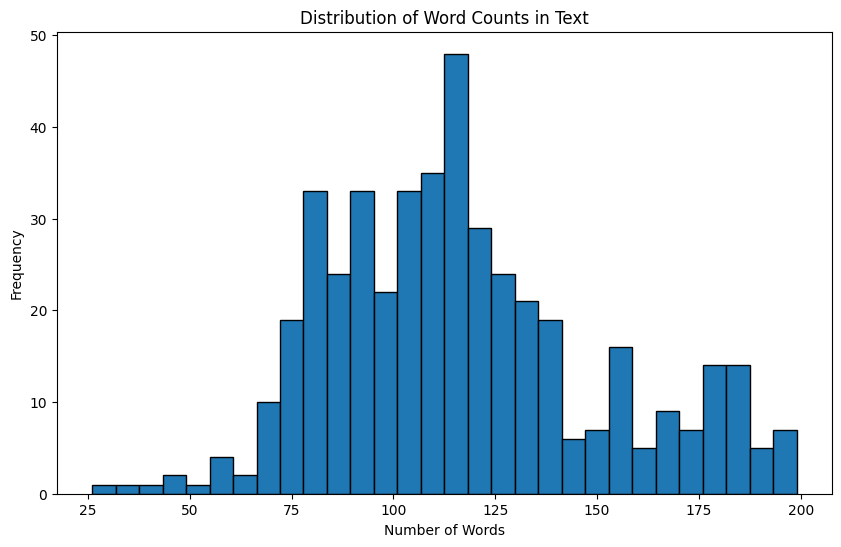

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Langkah 1: Membaca dataset dari file CSV
df = pd.read_csv('/content/dataset_sampled_kurang_200 (2).csv')

# Langkah 2: Menghitung jumlah kata pada setiap baris di kolom yang berisi teks (misal kolom 'abstract')
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Langkah 3: Membuat histogram untuk melihat persebaran jumlah kata
plt.figure(figsize=(10,6))
plt.hist(df['word_count'], bins=30, edgecolor='black')
plt.title('Distribution of Word Counts in Text')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Langkah 4: Mencari jumlah kata maksimal
max_word_count = df['word_count'].max()
print(f"Jumlah kata maksimal: {max_word_count}")

# Langkah 4: Mencari jumlah kata maksimal
min_word_count = df['word_count'].min()
print(f"Jumlah kata minimal: {min_word_count}")

Jumlah kata maksimal: 199
Jumlah kata minimal: 26


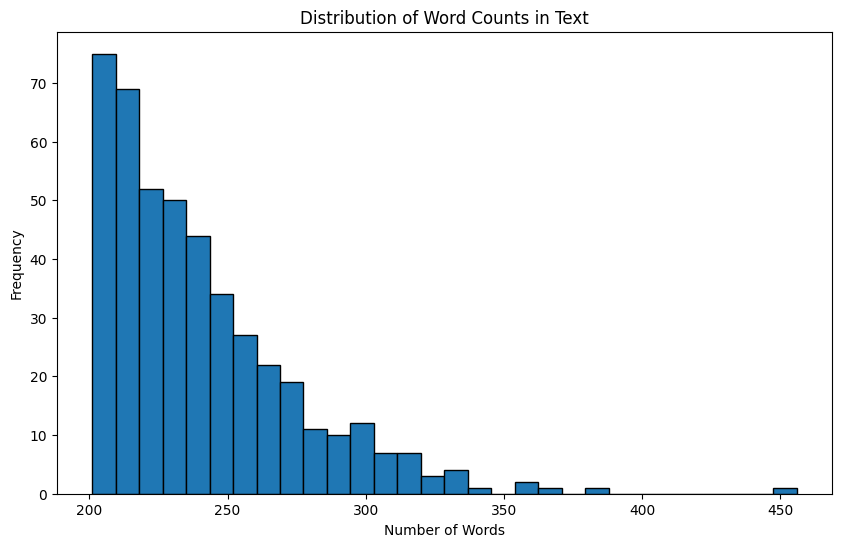

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Langkah 1: Membaca dataset dari file CSV
df = pd.read_csv('/content/dataset_sampled (1).csv')

# Langkah 2: Menghitung jumlah kata pada setiap baris di kolom yang berisi teks (misal kolom 'abstract')
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Langkah 3: Membuat histogram untuk melihat persebaran jumlah kata
plt.figure(figsize=(10,6))
plt.hist(df['word_count'], bins=30, edgecolor='black')
plt.title('Distribution of Word Counts in Text')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Langkah 4: Mencari jumlah kata maksimal
max_word_count = df['word_count'].max()
print(f"Jumlah kata maksimal: {max_word_count}")

# Langkah 4: Mencari jumlah kata maksimal
min_word_count = df['word_count'].min()
print(f"Jumlah kata minimal: {min_word_count}")

Jumlah kata maksimal: 456
Jumlah kata minimal: 201
